In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
#helper functions

def get_slope_values(type) :
    slopes = {}

    betas_df = pd.read_csv(f"../../results/{type}/betas.csv")
    for col in betas_df.columns:
        betas= betas_df[col].values
        slopes[col] = [eval(pair)[1] for pair in betas]
    return slopes


def get_slope_box_plot(slopes, true_slope, type):
    # Assuming slopes is a dictionary with keys and corresponding values
    data_to_plot = [slopes[key] for key in slopes]
    names = ["Randomization", "Randomization with weights", "SR", "SR with weights"]
    
    custom_colors = ["#3e6e29", "#b6d7a8", "#6b1218", "#f02937"]
    # Create a box plot using Seaborn
    sns.set(style="whitegrid", palette=custom_colors)  # Set the style and color palette
    plt.figure(figsize=(10, 6))  # Set the figure size

    sns.boxplot(data=data_to_plot, width=0.5, notch=True)

    # plt.title('Box Plot of Four Arrays', fontsize=16)
    plt.ylabel('Fitted slope', fontsize=14)
    plt.axhline(true_slope, color = "#cbd0f1", label = "Target slope (test set)")
    plt.xticks(ticks=range(len(names)), labels=names, rotation=45, ha='right', fontsize=12)
    plt.legend()

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(f"../../results/{type}/box_plot.png")
    plt.show()


In [8]:
slopes_s1 = get_slope_values("synthetic1")
slopes_s2 = get_slope_values("synthetic2")
true_slope_s1 = 0.3732543606072274
true_slope_s2 = -0.747770343556648


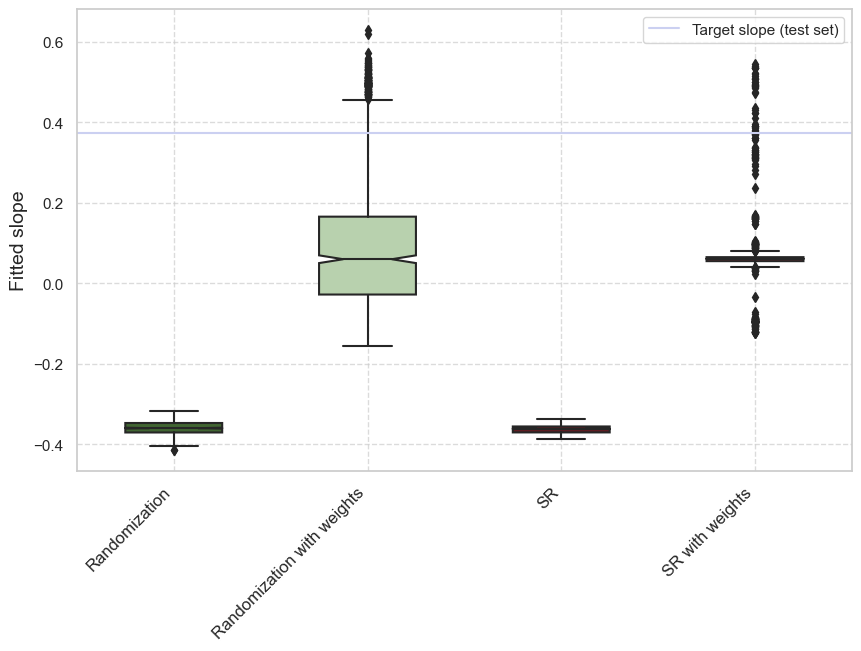

In [9]:
get_slope_box_plot(slopes_s1,  true_slope_s1, "synthetic1")

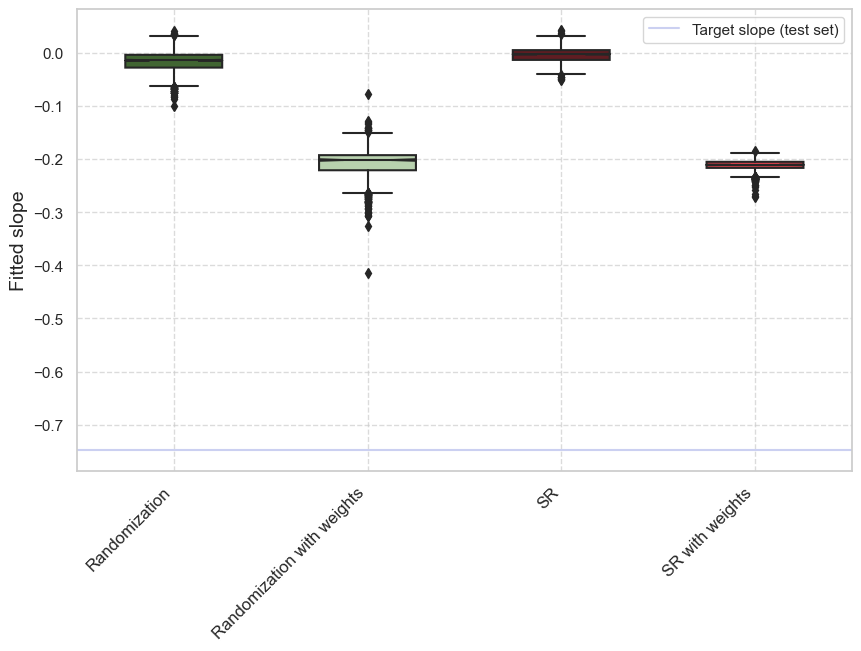

In [10]:
get_slope_box_plot(slopes_s2, true_slope_s2, "synthetic2")